<a href="https://colab.research.google.com/github/AnithaKJ/t/blob/main/Copy_of_Cluster_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
from google.colab import files


uploaded = files.upload()

Saving Live.csv to Live.csv


In [6]:
df = pd.read_csv(io.BytesIO(uploaded['Live.csv']))

In [7]:
df.shape

(7050, 16)

In [8]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [10]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [11]:
#Drop redundant columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [12]:
# Again view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [13]:
# View the statistical summary of numerical variables
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [14]:
# Explore status_id variable
# view the labels in the variable

df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [15]:
len(df['status_id'].unique())

6997

In [16]:
# Explore status_published variable
# view the labels in the variable

df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [17]:
len(df['status_published'].unique())

6913

In [18]:
# Explore status_type variable
# view the labels in the variable

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [19]:
len(df['status_type'].unique())

4

In [20]:
# Drop status_id and status_published variable from the dataset
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [22]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [23]:
# Declare feature vector and target variable

X = df

y = df['status_type']

In [24]:
# Convert categorical variable into integers


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [26]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [27]:
#feature Scaling
cols = X.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [28]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [29]:
#K-Means model with two clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [30]:
#K-Means model parameters study
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

In [31]:
kmeans.inertia_

237.75726404419646

In [32]:
# Check quality of weak classification by the model
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [33]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


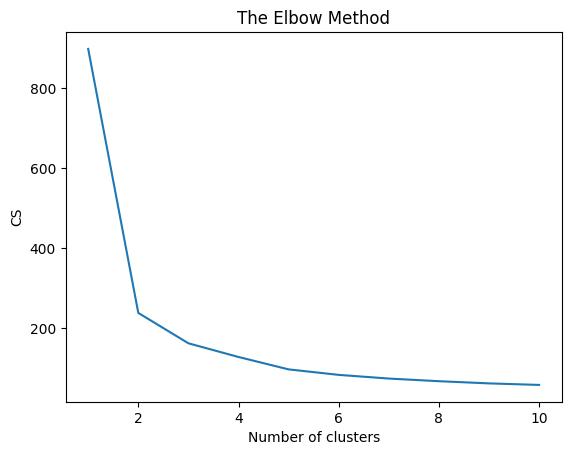

In [34]:
# Use elbow method to find optimal number of clusters

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


In [36]:
# K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


In [37]:
# K-Means model with 4 clusters
#X =df.iloc[:,:].values
kmeans = KMeans(n_clusters=4, random_state=0)

ymeans = kmeans.fit_predict(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))
print(labels)

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62
[0 1 0 ... 1 1 1]


In [38]:
unique_clusters = np.unique(labels)

# Print samples for each cluster
for cluster_label in unique_clusters:
    cluster_samples = df[labels == cluster_label]
    #print(f"Cluster {cluster_label} samples:")
    cluster_length = len(cluster_samples)
    print(f"Cluster {cluster_label} samples (Length: {cluster_length}):")
    print(cluster_samples)
    print('\n')

Cluster 0 samples (Length: 2424):
      status_type  num_reactions  num_comments  num_shares  num_likes  \
0               3            529           512         262        432   
2               3            227           236          57        204   
6               3            503           614          72        418   
7               3            295           453          53        260   
15              3            332           100          30        303   
...           ...            ...           ...         ...        ...   
6991            2              6             0           1          6   
6992            3             36           240          20         33   
7015            2             63             0           1         62   
7016            2              5             0           0          5   
7034            3              6             0           0          6   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
0            92         3   

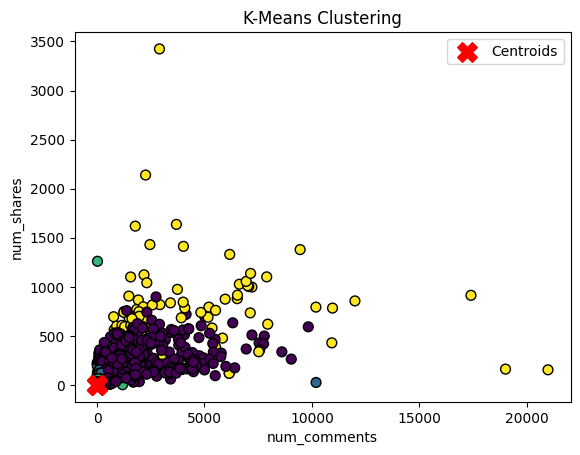

In [39]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified attributes and 'labels' is the cluster assignment obtained from K-Means
x_attribute = 'num_comments'
y_attribute = 'num_shares'

# Scatter plot of the K-Means clustering results
plt.scatter(df[x_attribute], df[y_attribute], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, df.columns.get_loc(x_attribute)], kmeans.cluster_centers_[:, df.columns.get_loc(y_attribute)], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.legend()
plt.show()

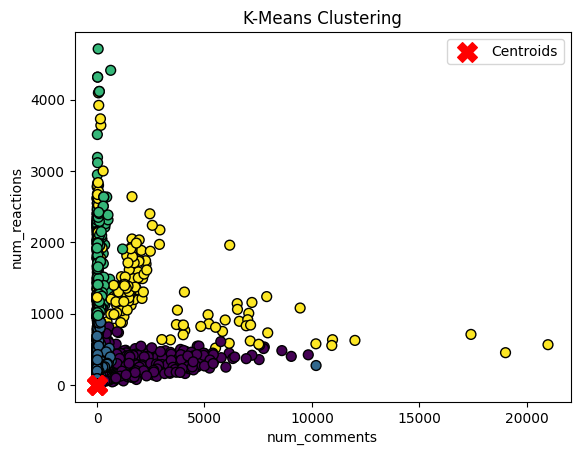

In [40]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified attributes and 'labels' is the cluster assignment obtained from K-Means
x_attribute = 'num_comments'
y_attribute = 'num_reactions'

# Scatter plot of the K-Means clustering results
plt.scatter(df[x_attribute], df[y_attribute], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, df.columns.get_loc(x_attribute)], kmeans.cluster_centers_[:, df.columns.get_loc(y_attribute)], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.legend()
plt.show()

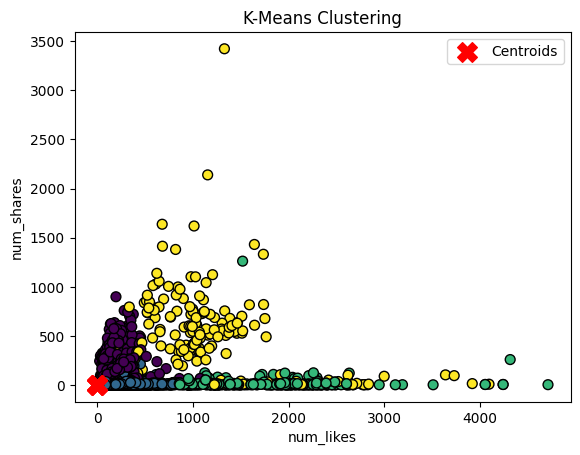

In [41]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified attributes and 'labels' is the cluster assignment obtained from K-Means
x_attribute = 'num_likes'
y_attribute = 'num_shares'

# Scatter plot of the K-Means clustering results
plt.scatter(df[x_attribute], df[y_attribute], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, df.columns.get_loc(x_attribute)], kmeans.cluster_centers_[:, df.columns.get_loc(y_attribute)], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.legend()
plt.show()

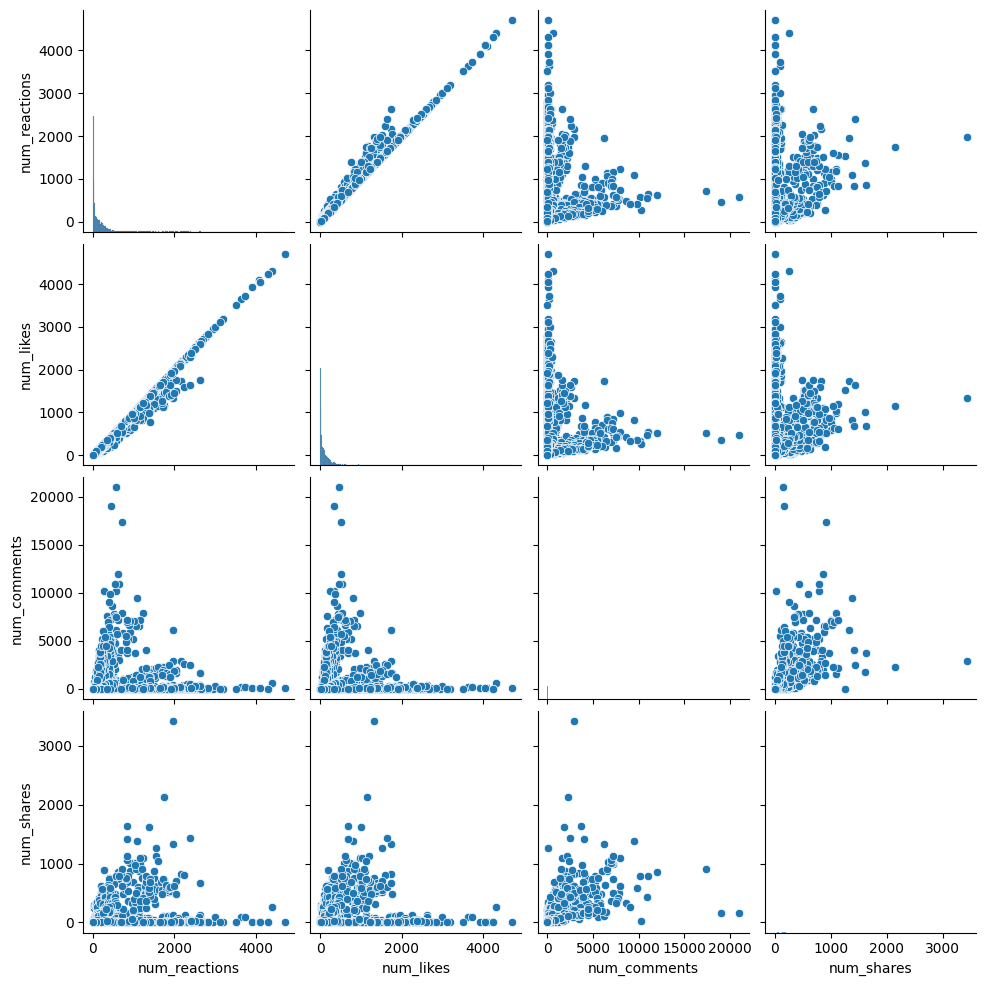

In [42]:
sns.pairplot(df[['num_reactions', 'num_likes', 'num_comments', 'num_shares']], kind='scatter')


In [43]:
#selecting random samples from clusters

In [44]:
# Identify Unique Clusters and applying equal sampling technique
unique_clusters = np.unique(labels)
sampled_data = pd.DataFrame()
num_samples_per_cluster = 10
for cluster_label in unique_clusters:
    # Filter Data Points in the Current Cluster
    cluster_indices = np.where(labels == cluster_label)[0]
    cluster_data = df.iloc[cluster_indices]

    # Randomly Select Subset of Data Points from the Current Cluster
    sampled_indices = np.random.choice(cluster_data.index, size=num_samples_per_cluster, replace=False)
    sampled_cluster_data = cluster_data.loc[sampled_indices]

    # Append Sampled Data from Current Cluster to the Final Sampled Data
    sampled_data = pd.concat([sampled_data, sampled_cluster_data])

# Display the sampled data
print(sampled_data)
# Randomly Select a Cluster
#selected_cluster = np.random.choice(unique_clusters)

# Filter Data Points in the Selected Cluster
#sampled_df = df[labels == selected_cluster]


      status_type  num_reactions  num_comments  num_shares  num_likes  \
6000            3            268           816         529        188   
462             3            239           127           7        189   
225             3            321          1381          67        275   
6818            2            160           265           0        155   
1545            3            460            31           1        460   
1458            3            880            24           1        880   
6764            3            303          3593         264        253   
3896            3            300           297          60        267   
6065            3            183           908         266        122   
1523            3            247             8           0        247   
2751            1             58             1           0         58   
3888            1            707            63           3        694   
5685            1              7             0     

In [45]:
# proportional sampling technique to select the samples from the each clusters
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Initialize DataFrame to store sampled data
sampled_data = pd.DataFrame()
desired_total_samples = 1000


# Calculate number of samples to be taken from each cluster
num_samples_per_cluster = {}
cluster_proportions = {}
unique_clusters, cluster_counts = np.unique(labels, return_counts=True)
total_samples = len(df)
for cluster_label, count in zip(unique_clusters, cluster_counts):
    num_samples = int(count / total_samples * desired_total_samples)
    num_samples_per_cluster[cluster_label] = num_samples
    cluster_proportions[cluster_label] = count / total_samples

# Iterate over unique clusters
for cluster_label in np.unique(labels):
    # Filter data points in current cluster
    cluster_indices = np.where(labels == cluster_label)[0]
    cluster_data = df.iloc[cluster_indices]

    # Perform proportional sampling within current cluster
    num_samples = num_samples_per_cluster[cluster_label]
    sampled_cluster_data = cluster_data.sample(n=num_samples, random_state=42)
    print(f"Cluster {cluster_label}: {num_samples} samples selected ({cluster_proportions[cluster_label]:.2%} of total)")

    # Append sampled data from current cluster to final sampled data
    sampled_data = pd.concat([sampled_data, sampled_cluster_data])

# Display sampled data
print(sampled_data)

Cluster 0: 343 samples selected (34.38% of total)
Cluster 1: 583 samples selected (58.38% of total)
Cluster 2: 44 samples selected (4.47% of total)
Cluster 3: 27 samples selected (2.77% of total)
      status_type  num_reactions  num_comments  num_shares  num_likes  \
4972            3             79             1          19         79   
1405            3            758            24           3        758   
4731            3             27             0          18         27   
1442            3            353             0           3        353   
1522            3            287             9           0        287   
...           ...            ...           ...         ...        ...   
1568            3           1190            12           1       1190   
1334            3           2081            58          36       2081   
4570            3           1412          1247         739       1117   
4505            3           1319          1293         377       1063   
1

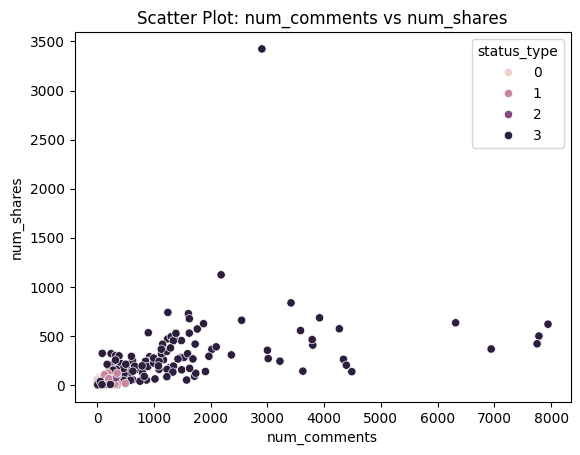

In [50]:
# Scatter plot of num_comments vs num_shares
sns.scatterplot(data=sampled_data, x='num_comments', y='num_shares', hue='status_type')
plt.title('Scatter Plot: num_comments vs num_shares')
plt.xlabel('num_comments')
plt.ylabel('num_shares')
plt.show()


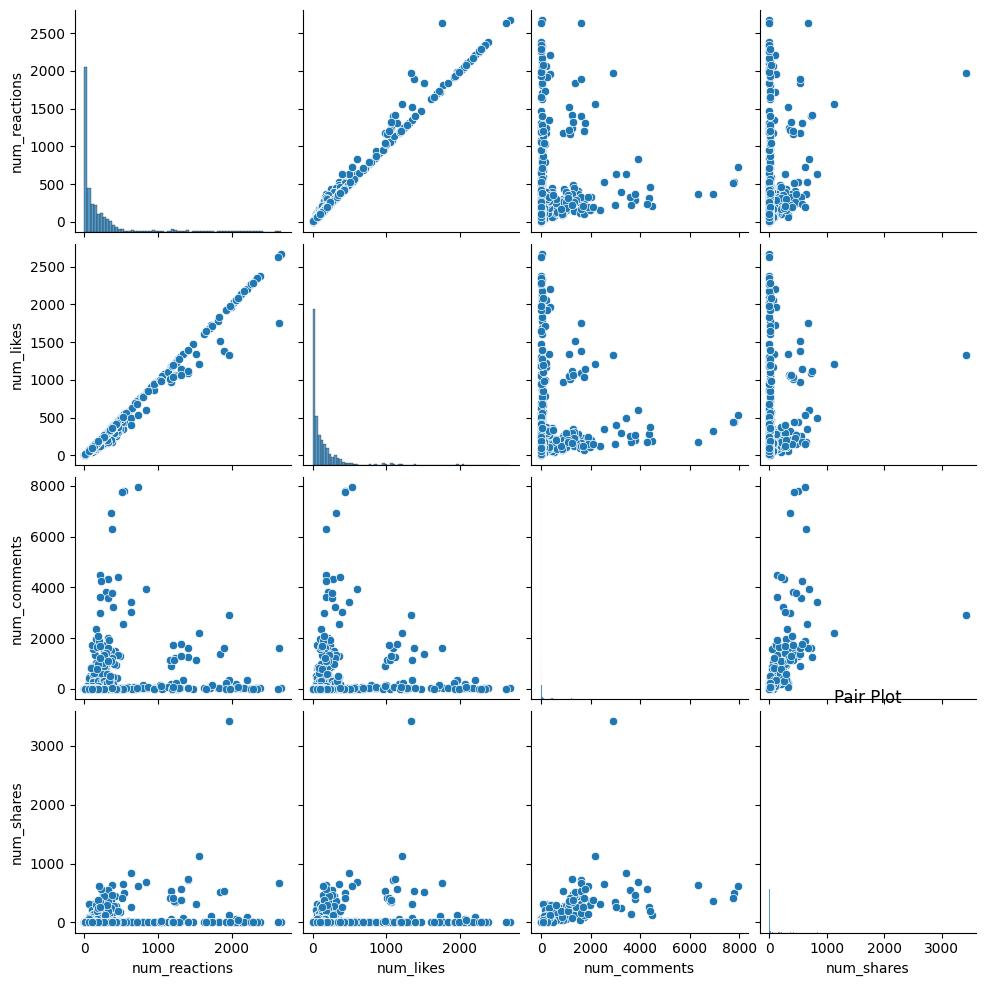

In [51]:
import seaborn as sns

# Pair plot of selected attributes
sns.pairplot(sampled_data[['num_reactions', 'num_likes', 'num_comments', 'num_shares']])
plt.title('Pair Plot')
plt.show()


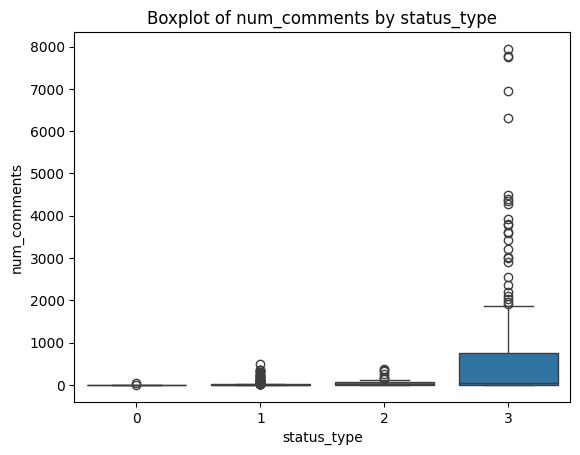

In [47]:
sns.boxplot(data=sampled_data, x='status_type', y='num_comments')
plt.title('Boxplot of num_comments by status_type')
plt.xlabel('status_type')
plt.ylabel('num_comments')
plt.show()


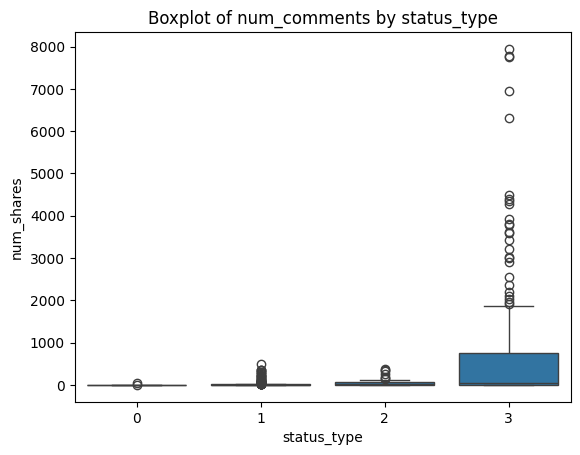

In [48]:
sns.boxplot(data=sampled_data, x='status_type', y='num_comments')
plt.title('Boxplot of num_comments by status_type')
plt.xlabel('status_type')
plt.ylabel('num_shares')
plt.show()

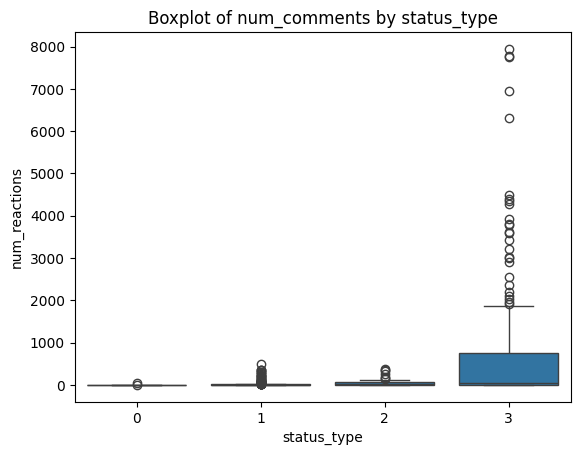

In [49]:
sns.boxplot(data=sampled_data, x='status_type', y='num_comments')
plt.title('Boxplot of num_comments by status_type')
plt.xlabel('status_type')
plt.ylabel('num_reactions')
plt.show()